In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score

In [191]:
df = pd.read_csv('concrete_data.csv')

In [193]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [195]:
df.shape

(1030, 9)

In [197]:
# df.isnull().sum()

In [199]:
x = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [201]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:8], df.iloc[:,-1], test_size  = 0.2, random_state = 42)

In [203]:
# x_train
# x_test
# y_train
# y_test

In [205]:
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

r2_score(y_test, y_pred)

0.6275531792314852

In [207]:
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring = 'r2'))

0.4609940491662865

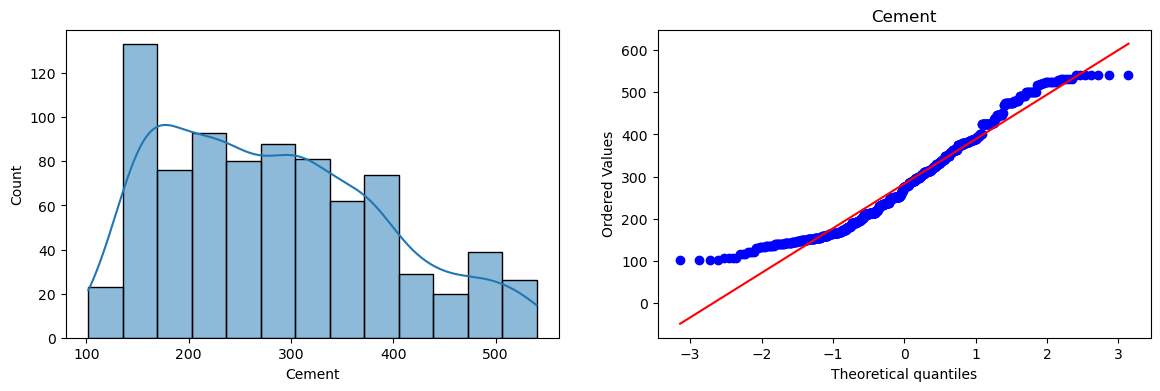

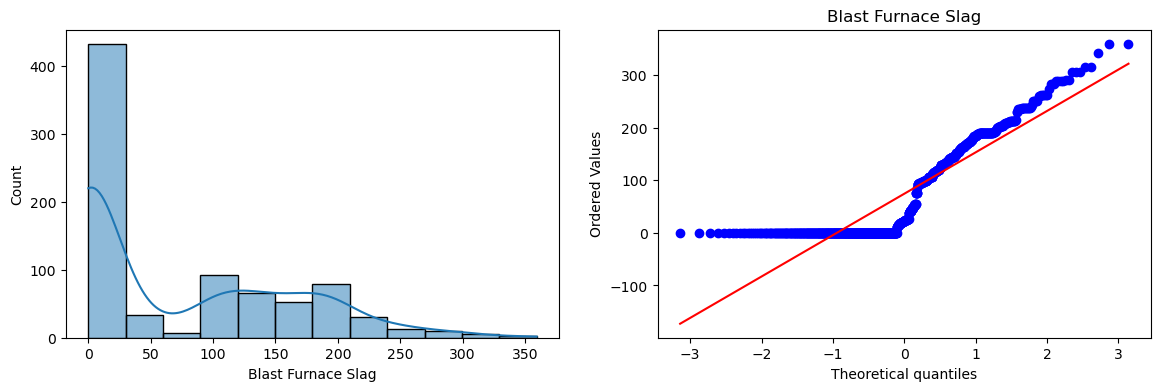

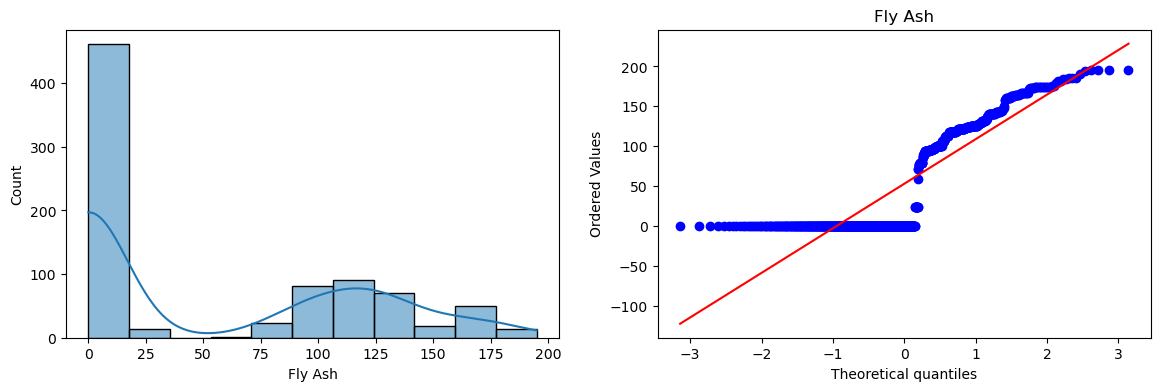

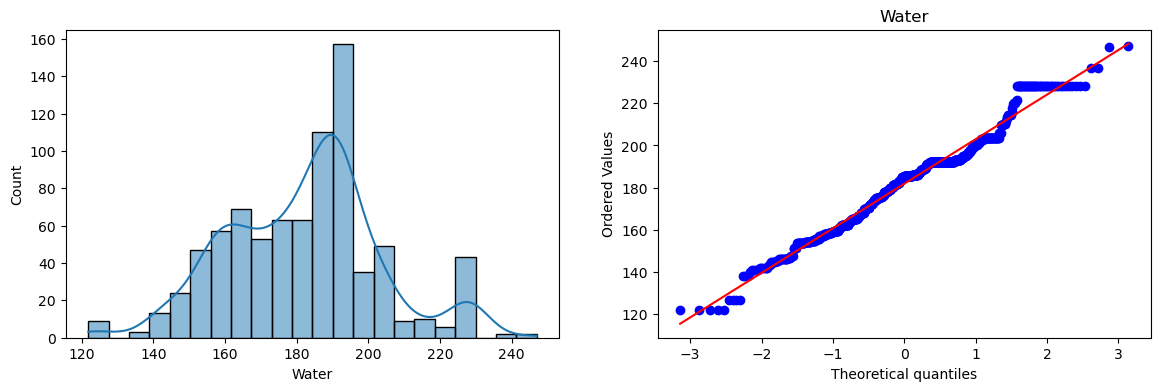

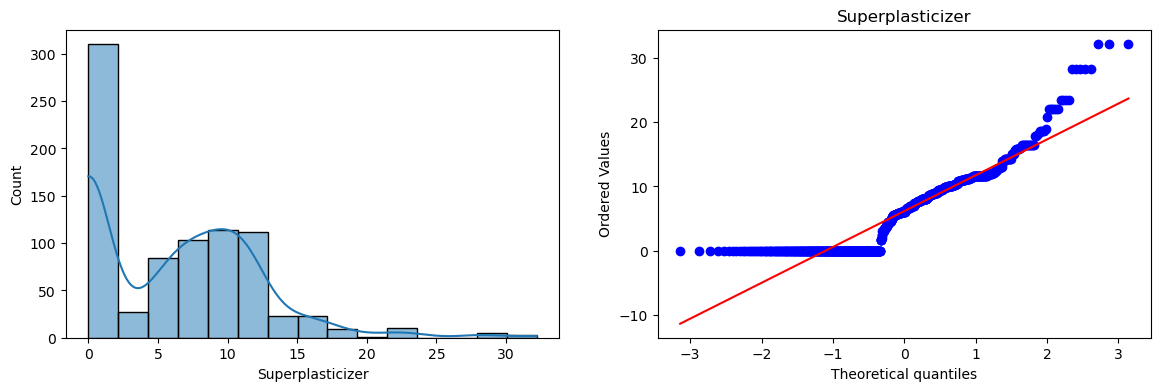

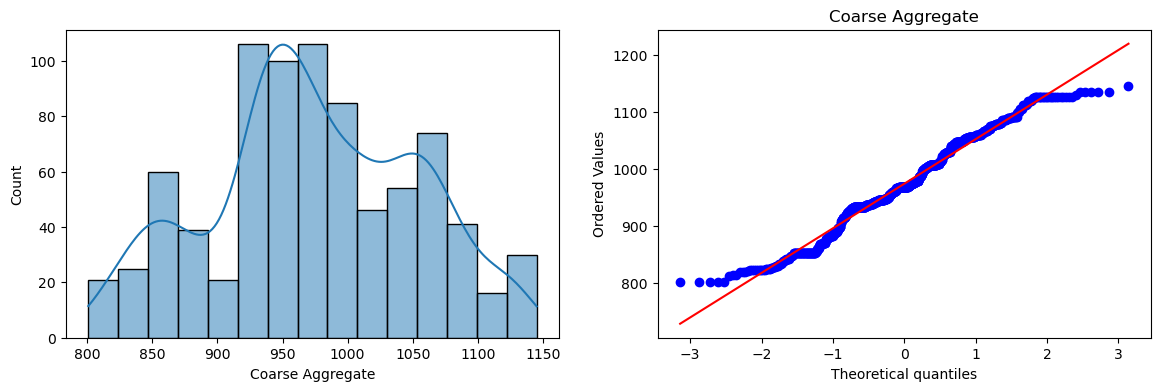

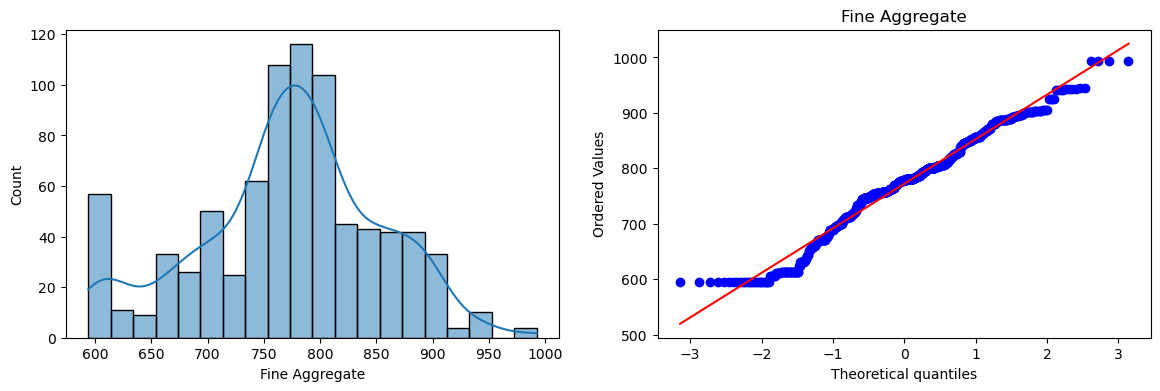

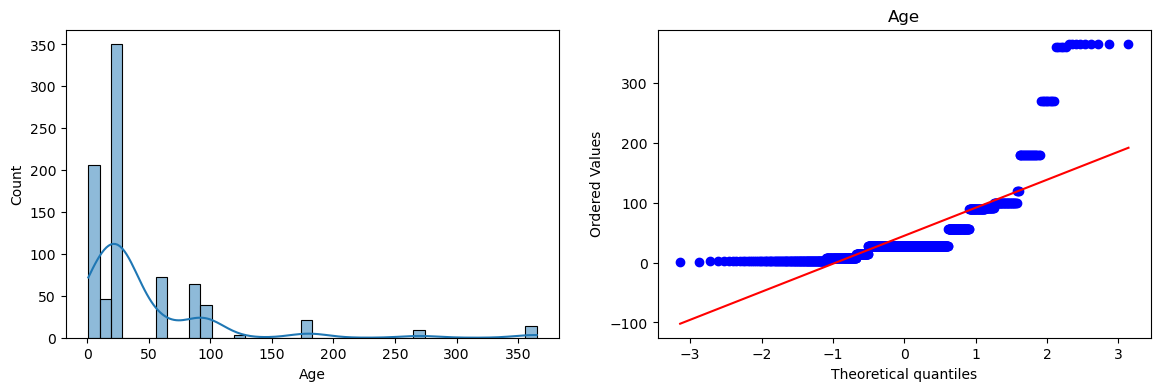

In [213]:
# Without transformation

for cols in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[cols], kde = True)

    plt.subplot(122)
    stats.probplot(x_train[cols], dist = "norm", plot = plt)
    plt.title(cols)

plt.show()

In [214]:
pt = PowerTransformer(method = 'box-cox')

x_train_transformed = pt.fit_transform(x_train+0.00000001)
x_test_transformed = pt.fit_transform(x_test+0.000000001)

pd.DataFrame({'cols':x_train.columns, 'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.019745
2,Fly Ash,-0.004680
3,Water,0.959062
4,Superplasticizer,0.073368
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [217]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(x_train_transformed,y_train)

y_pred2 = lr.predict(x_test_transformed)

r2_score(y_test,y_pred2)

0.804617129024152

In [221]:
# Using cross val score

pt = PowerTransformer(method = 'box-cox')
x_transformed = pt.fit_transform(x+0.00000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring='r2'))

0.6654921098317108

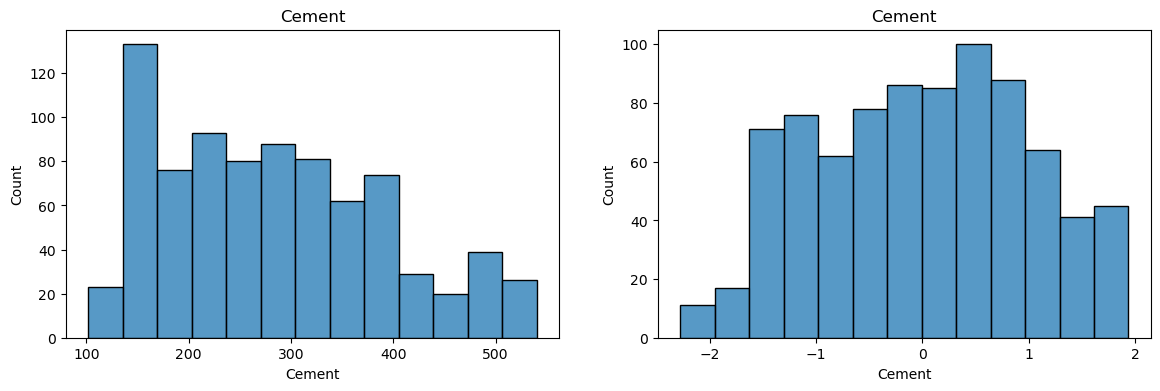

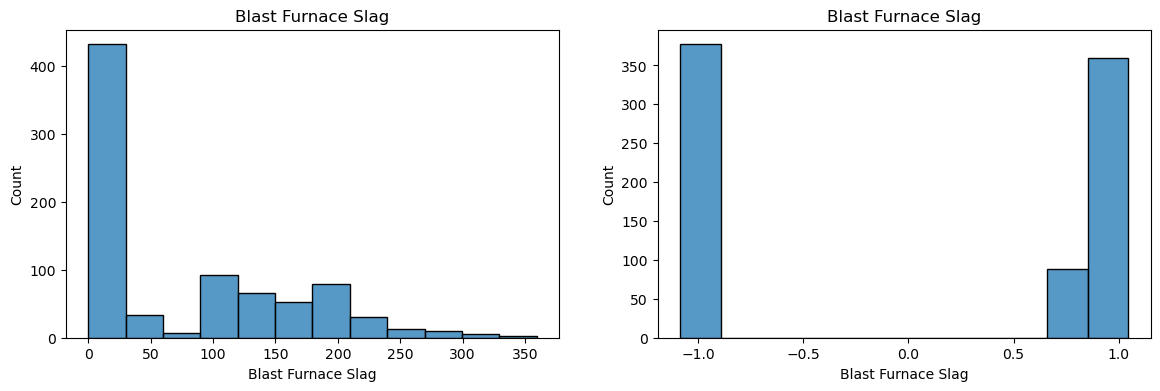

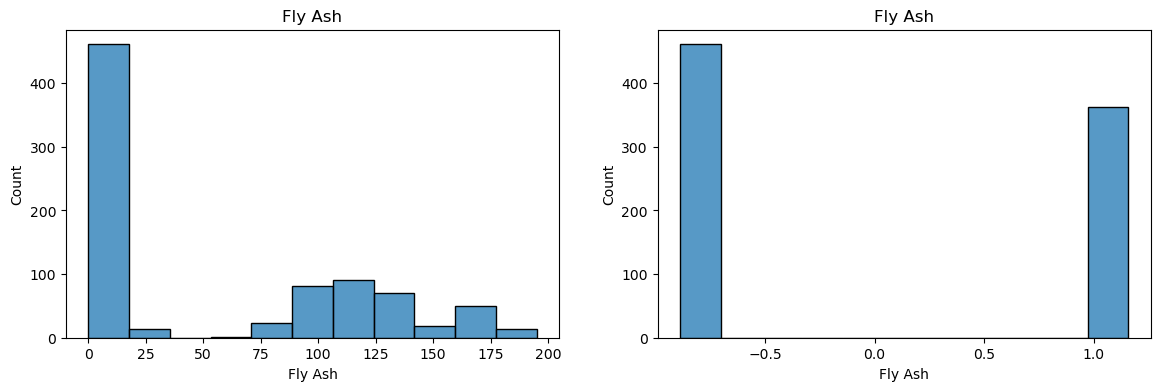

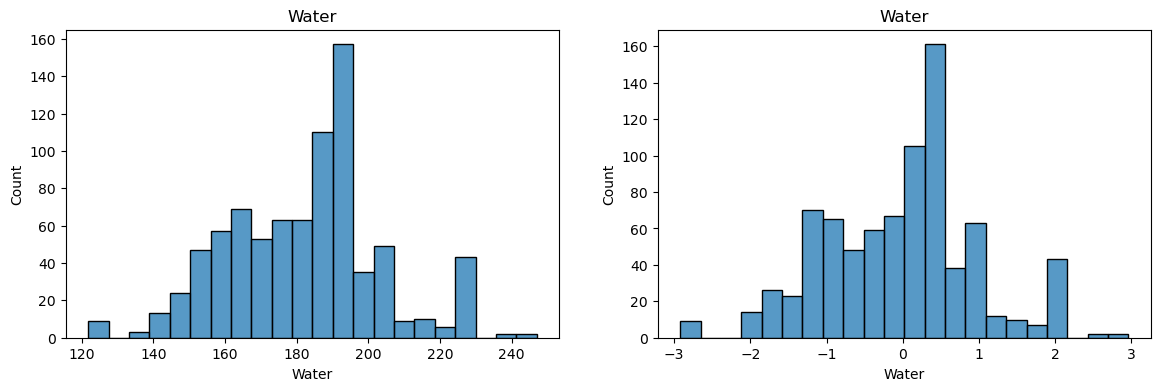

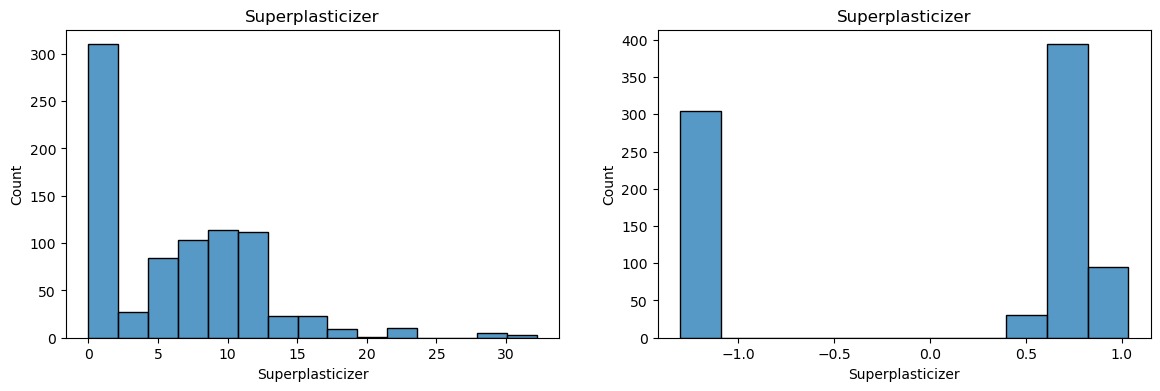

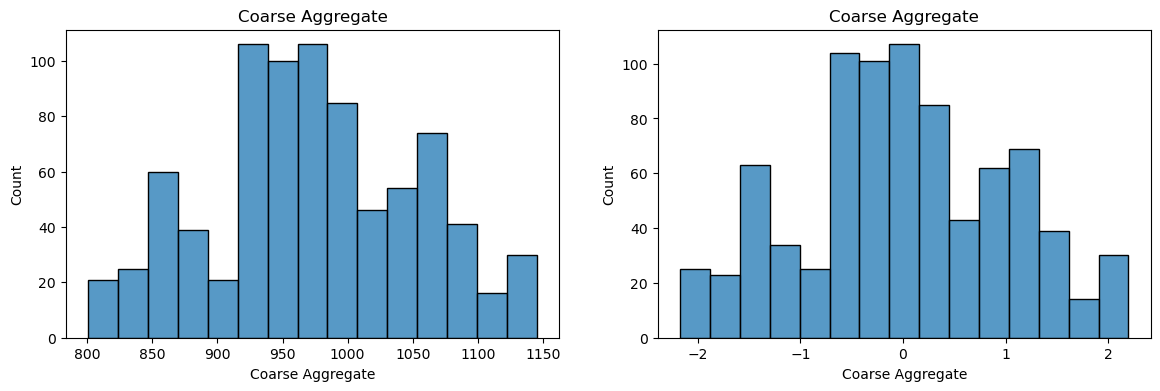

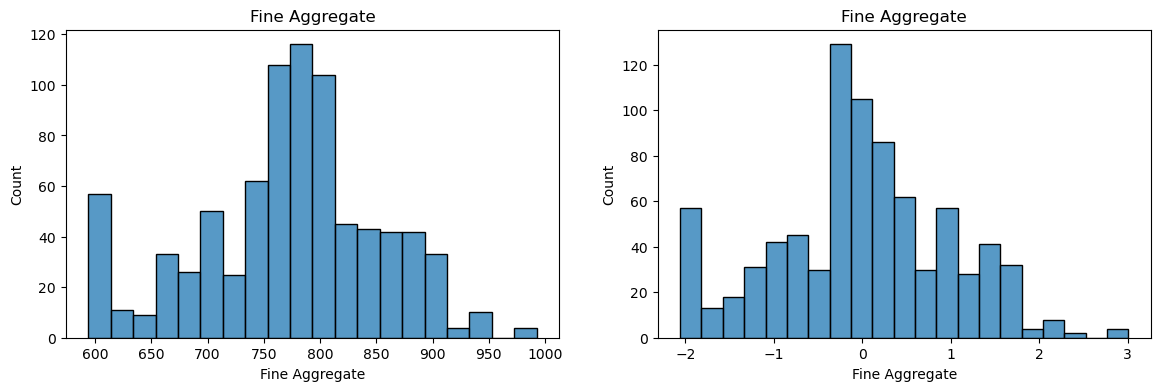

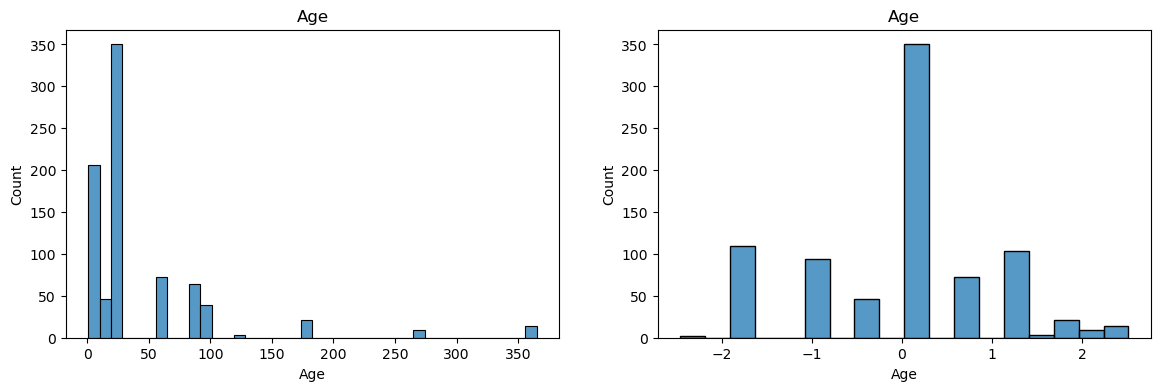

In [231]:
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_transformed[col])
    plt.title(col)

plt.show()
 

In [237]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2,y_train)

y_pred3 = lr.predict(x_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':x_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906513354853


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [241]:
pt = PowerTransformer()
x_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed2,y,scoring='r2'))

0.6834625141500864

In [245]:
x_train_transformed2 = pd.DataFrame(x_train_transformed2,columns=x_train.columns)

C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


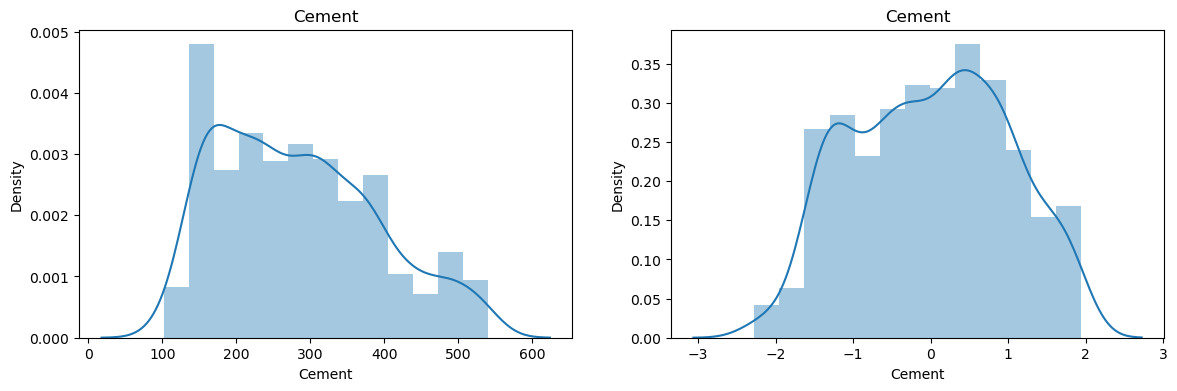

C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


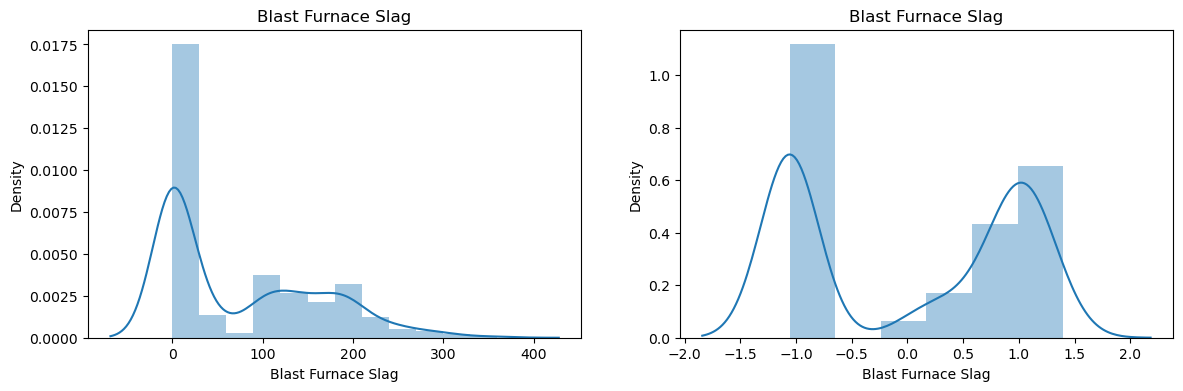

C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


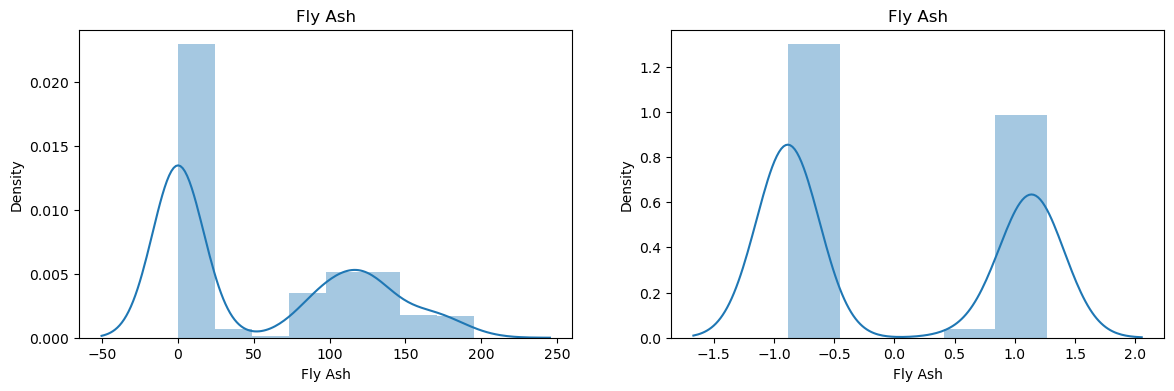

C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


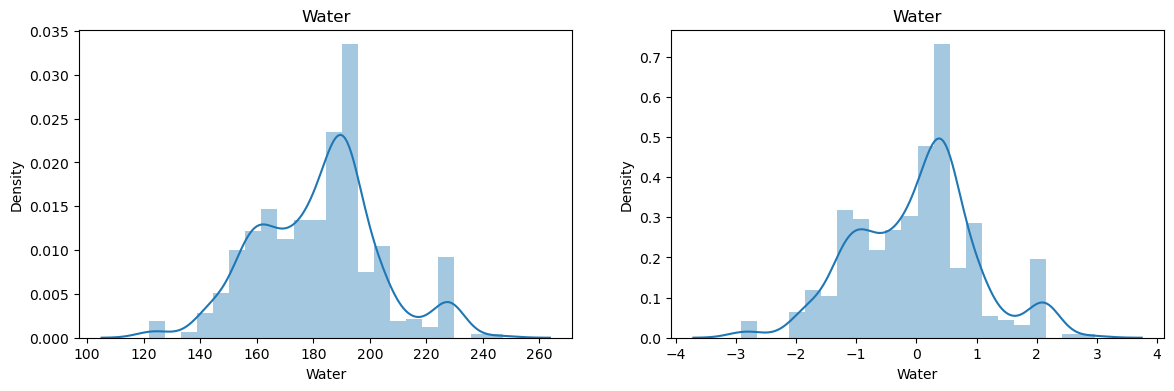

C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


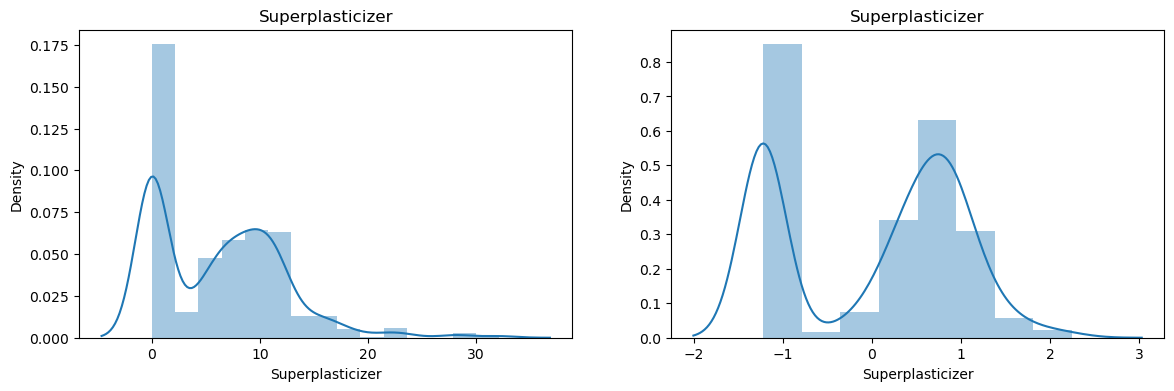

C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


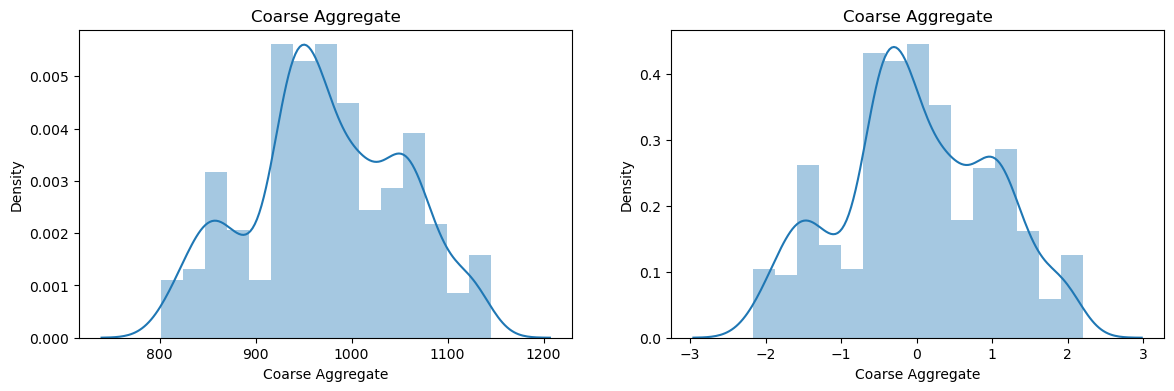

C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


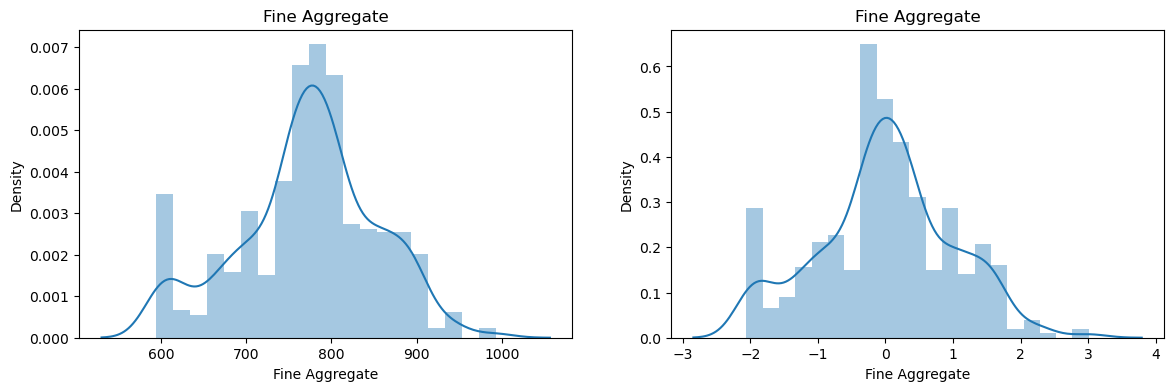

C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\vasis\AppData\Local\Temp\ipykernel_5072\1729237315.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed2[col])


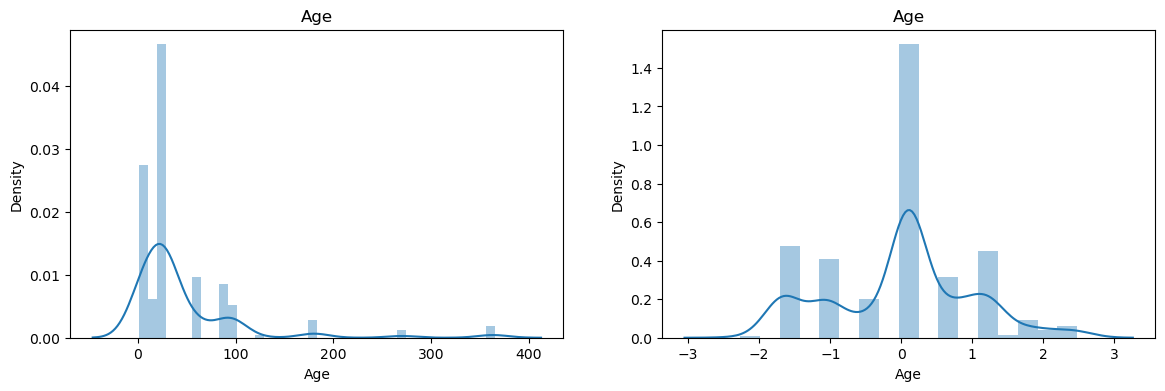

In [255]:
# Before and after comparision for Yeo-Johnson

for col in x_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_train_transformed2[col])
    plt.title(col)

    plt.show()

In [259]:
# Side by side Lambdas
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885
